<a href="https://colab.research.google.com/github/lcduquev/Analisis-Numerico/blob/master/Chapter%204/Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problems from Chapter 4

In [74]:
#Importamos las librerías necesarias para resolver los problemas

import cvxpy as cp
import numpy as np
import math
import sympy as sp
from sympy import Integral, Matrix, pprint, solve
from scipy import optimize
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")

In [75]:
#Definimos las funciones que se van a utilizar para calcular el gradiente y el Hessiano de las funciones

def gradient(f,*variables):

  n=len(variables)
  m=1
  grad=sp.zeros(n,m)
  i=0
  for var in variables:
    grad[i,0]=sp.diff(f,var)
    i+=1
  
  return grad

def hessian(f,*variables):

  n=len(variables)
  m=n
  hess=sp.zeros(n,m)
  for i in range(0,n):
    for j in range(0,n):
      first_diff=sp.diff(f,variables[j])
      second_diff=sp.diff(first_diff,variables[i])
      hess[i,j]=second_diff
  
  return hess

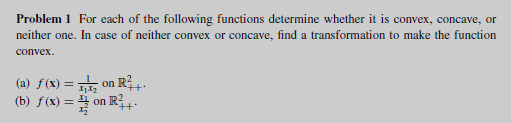

### (a)

La matriz Hessiana es:


⎡  2         1   ⎤
⎢──────   ───────⎥
⎢  3        2   2⎥
⎢x₁ ⋅x₂   x₁ ⋅x₂ ⎥
⎢                ⎥
⎢   1       2    ⎥
⎢───────  ────── ⎥
⎢  2   2       3 ⎥
⎣x₁ ⋅x₂   x₁⋅x₂  ⎦



Los valores propios de la matriz son: 



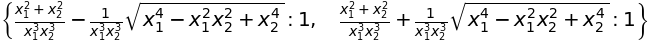

In [106]:
#Definimos la función
x1 = sp.Symbol('x_1')
x2 = sp.Symbol('x_2')
f = 1/(x1*x2) 

#Calculamos el Hessiano
hess = hessian(f,x1,x2)
hess_val = sp.lambdify([x1,x2],hess)

sp.init_printing()
print("La matriz Hessiana es:")
display(Matrix(hess))
print("\n")
print("Los valores propios de la matriz son: \n")
hess.eigenvals()

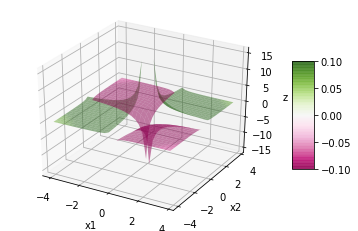

In [107]:
#Graficamos la función y sus líneas de contorno 

xmax = 4
delta = 0.25
XX = np.arange(-xmax, xmax, delta)
YY = np.arange(-xmax, xmax, delta)
X, Y = np.meshgrid(XX, YY)

F = sp.lambdify([x1,x2],f)
Z = F(X,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.PiYG, alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

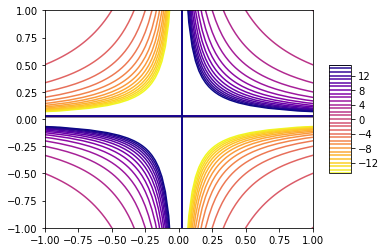

In [110]:
xmax = 4
delta = 0.025
XX = np.arange(-xmax, xmax, delta)
YY = np.arange(-xmax, xmax, delta)
X, Y = np.meshgrid(XX, YY)
F = sp.lambdify([x1,x2],f)
Z = F(X,Y)
contour_levels=np.arange(15,-16,-1.0)
contour = plt.contour(X, Y,Z,np.flip(contour_levels),cmap=cm.plasma_r)
plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.colorbar(contour, shrink=0.5, aspect=5)

## (b)

La matriz Hessiana es:


⎡     -2  ⎤
⎢ 0   ─── ⎥
⎢       3 ⎥
⎢     x₂  ⎥
⎢         ⎥
⎢-2   6⋅x₁⎥
⎢───  ────⎥
⎢  3    4 ⎥
⎣x₂   x₂  ⎦



Los valores propios de la matriz son: 



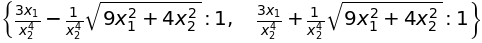

In [111]:
#Definimos la función
x1 = sp.Symbol('x_1')
x2 = sp.Symbol('x_2')
f = x1/(x2**2) 

#Calculamos el Hessiano
hess = hessian(f,x1,x2)
hess_val = sp.lambdify([x1,x2],hess)

sp.init_printing()
print("La matriz Hessiana es:")
display(Matrix(hess))
print("\n")
print("Los valores propios de la matriz son: \n")
hess.eigenvals()

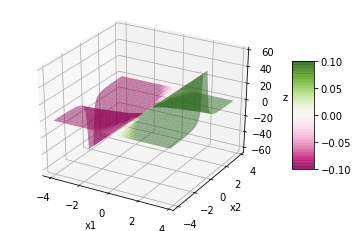

In [112]:
#Graficamos la función y sus líneas de contorno 

xmax = 4
delta = 0.25
XX = np.arange(-xmax, xmax, delta)
YY = np.arange(-xmax, xmax, delta)
X, Y = np.meshgrid(XX, YY)

F = sp.lambdify([x1,x2],f)
Z = F(X,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.PiYG, alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

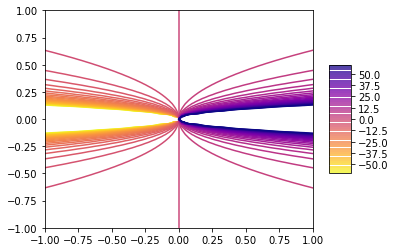

In [122]:
xmax = 4
delta = 0.025
XX = np.arange(-xmax, xmax, delta)
YY = np.arange(-xmax, xmax, delta)
X, Y = np.meshgrid(XX, YY)
F = sp.lambdify([x1,x2],f)
Z = F(X,Y)
contour_levels=np.arange(60,-61,-2.5)
contour = plt.contour(X, Y,Z,np.flip(contour_levels),cmap=cm.plasma_r)
plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.colorbar(contour, shrink=0.5, aspect=5)

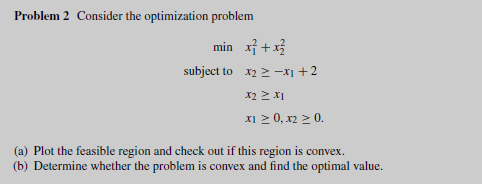

In [9]:
#Definimos la función y sus restricciones

x1 = sp.Symbol('x_1')
x2 = sp.Symbol('x_2')
f = x1**2+x2**2
subject1 = x1+x2-2  # restricción: >=0
subject2 = x2-x1    # restricción: >=0

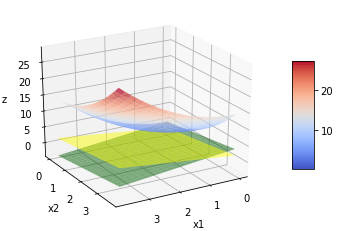

In [10]:
#Graficamos la función y las restricciones

delta = 0.2
XX = np.arange(0, 4, delta)   # aseguramos la condición x1>=0
YY = np.arange(0, 4, delta)   # aseguramos la condición x2>=0
X, Y = np.meshgrid(XX, YY)

F = sp.lambdify([x1,x2],f)
Z = F(X,Y)
R1=sp.lambdify([x1,x2],subject1)
Z1=R1(X,Y)
R2=sp.lambdify([x1,x2],subject2)
Z2=R2(X,Y)


fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.7)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.plot_surface(X, Y, Z1, color='yellow',alpha=0.5)
ax.plot_surface(X, Y, Z2, color='green',alpha=0.5)

ax.view_init(25,60)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

### (a)

Text(0, 0.5, '$y$')

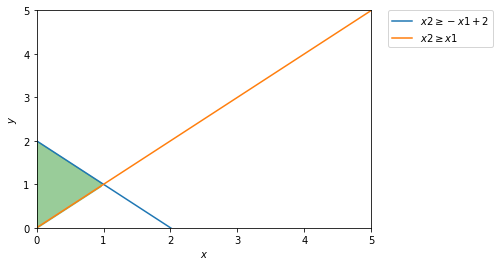

In [71]:
# Graficamos la región factible

x = np.linspace(0, 5, 100)
y1 = 2 - x
y2 = x

plt.plot(x, y1, label=r'$x2\geq -x1+2$')
plt.plot(x, y2, label=r'$x2\geq x1$')
plt.xlim((0, 5))
plt.ylim((0, 5))
plt.fill_between(x, y1, y2, where = (y1>y2), color='green', alpha=0.4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

La gráfica anterior nos muestra que la región factible sí es convexa, pues al trazar un segmento de línea que conecta dos puntos factibles cualesquiera este pasa sólo por otros puntos factibles, y no por puntos fuera del conjunto factible.


### (b)


In [12]:
# Para saber si el problema es convexo, calculamos la matriz Hessiana de la función

hess = hessian(f,x1,x2)
hess_val = sp.lambdify([x1,x2],hess)

sp.init_printing()
print("La matriz Hessiana es:")
display(Matrix(hess))
print("\n")
print("Los valores propios de la matriz son: \n")
hess.eigenvals()

La matriz Hessiana es:


⎡2  0⎤
⎢    ⎥
⎣0  2⎦



Los valores propios de la matriz son: 



Podemos observar que la matriz Hessiana es definida positiva y sus valores propios son positivos, por lo que se puede afirmar que el problema es convexo.

In [13]:
# Hallamos los valores óptimos con la libreria cvxpy

x1=cp.Variable(1)
x2=cp.Variable(1)
cost=x1**2+x2**2

prob = cp.Problem(cp.Minimize(cost),
                  [x2>=-x1+2,
                  x2>=x1,
                  x2>=0,
                  x1>=0]
                  )
prob.solve()

print("The optimal value is", prob.value)
print("A solution x is")
print(f"x1 = {x1.value} , x2 = {x2.value}")

The optimal value is 2.000000000000001
A solution x is
x1 = [1.] , x2 = [1.]


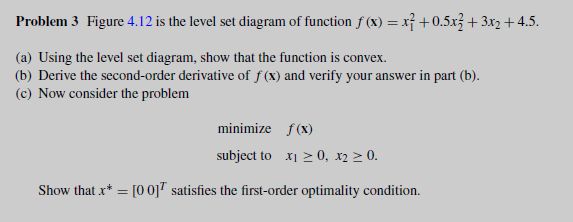


### (a)

El diagrama de level set de la función es el siguiente

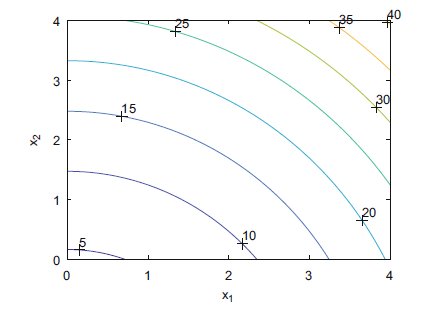

### (b)

In [14]:
# Para saber si el problema es convexo, calculamos la matriz Hessiana de la función

x1 = sp.Symbol('x_1')
x2 = sp.Symbol('x_2')
f = x1**2+0.5*x2**2+3*x2+4.5

hess = hessian(f,x1,x2)
hess_val = sp.lambdify([x1,x2],hess)

sp.init_printing()
print("La matriz Hessiana es:")
display(Matrix(hess))
print("\n")
print("Los valores propios de la matriz son: \n")
hess.eigenvals()

La matriz Hessiana es:


⎡2   0 ⎤
⎢      ⎥
⎣0  1.0⎦



Los valores propios de la matriz son: 



Podemos observar que la matriz Hessiana es definida positiva y sus valores propios son positivos, por lo que se puede afirmar que el problema es convexo.

### (c)

In [15]:
# Para ver si el punto x = [0 0]T satisface la condición necesaria de primer orden encontramos el gradiente de la función

grad=gradient(f,x1,x2)
display(Matrix(grad))

⎡   2⋅x₁   ⎤
⎢          ⎥
⎣1.0⋅x₂ + 3⎦

Evaluando en el punto $x* = \begin{pmatrix}
  0 \\
  0 \\
   \end{pmatrix}$ , tenemos que $\bigtriangledown f(x*) = \begin{pmatrix}
  0 \\
  3 \\
   \end{pmatrix}$

   $d^T \bigtriangledown f(x*) = 0d_1 + 3d_2 $

   
Como $x*$ es un punto límite, y cualquier dirección factible en este punto es de la forma $ d = \begin{pmatrix}
  d_1 \\
  d_2 \\
   \end{pmatrix},$ $d_1 >0, d_2 >0.$ 

Por lo tanto,   $d^T \bigtriangledown f(x*) $ siempre será $>=0$, lo que significa que $x*$ satisface la condición necesaria de primer orden.

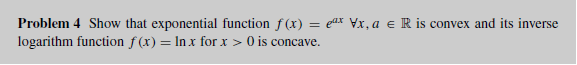

Como las funciones son de una sola variable, podemos determinar si son cóncavas o convexas analizando sus respectivas gráficas.

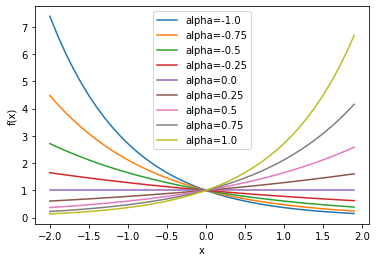

In [26]:
# Graficar f(x) = e^ax

alpha=np.arange(-1,1+0.25,0.25)
x=np.arange(-2,2,0.1)

for a in alpha:
  y=np.exp(x*a)
  plt.plot(x,y,label=f'alpha={a}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

Mediante la gráfica podemos deducir que $f(x) = e^{xa}$ es convexa para todos los valores reales de $ \alpha$

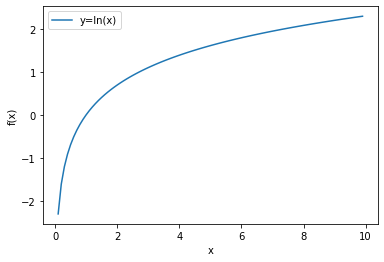

In [27]:
# Graficar f(x) = lnx, x>0

x=np.arange(0.1,10,0.1)
y=np.log(x)

plt.plot(x,y,label=f'y=ln(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

Mediante la gráfica podemos deducir que $f(x) = ln(x)$es cóncava para $x>0$


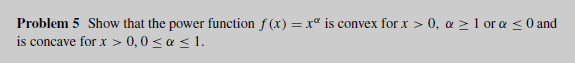

Como la función es de una sola variable, podemos determinar si es cóncava o convexa analizando las gráficas para cada intervalo de $\alpha$.

Text(0.5, 1.0, '$f(x) = x^a$, x>0 y $\\alpha \\geq$1 ')

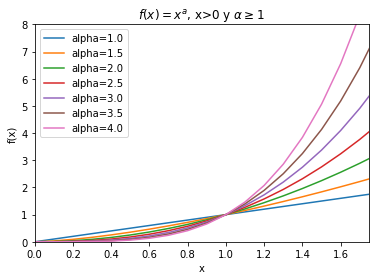

In [45]:
# Graficamos para f(x)=x^a con x>0 y a>=1

alpha=np.arange(1,4+0.5,0.5)
x=np.arange(0,2,0.1)

for a in alpha:
  y=x**a
  plt.plot(x,y,label=f'alpha={a}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.xlim(0,1.75)
plt.ylim(0,8)
plt.title(r'$f(x) = x^a$, x>0 y $\alpha \geq$1 ')

De la gráfica podemos deducir que la función $f(x) = x^a$, con $x>0$ y $\alpha \geq$1 es convexa.

Text(0.5, 1.0, '$f(x) = x^a$, x>0 y $\\alpha \\leq$0 ')

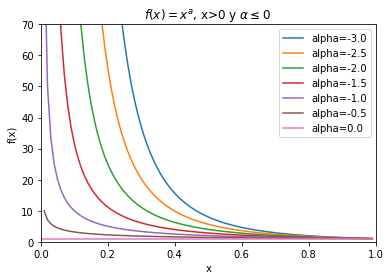

In [51]:
# Graficamos para f(x)=x^a con x>0 y a<=1

alpha=np.arange(-3,0+0.5,0.5)
x=np.arange(0,1,0.01)

for a in alpha:
  y=x**a
  plt.plot(x,y,label=f'alpha={a}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.xlim(0,1)
plt.ylim(0,70)
plt.title(r'$f(x) = x^a$, x>0 y $\alpha \leq$0 ')

De la gráfica podemos deducir que la función $f(x) = x^a$, con $x>0$ y $\alpha \leq$0 también es convexa.

Text(0.5, 1.0, '$f(x) = x^a$, x>0 y $0 \\leq \\alpha \\leq$1')

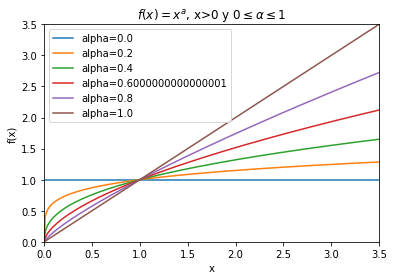

In [58]:
# Graficamos para f(x)=x^a con x>0 y 0<=a<=1

alpha=np.arange(0,1+0.2,0.2)
x=np.arange(0,4,0.01)

for a in alpha:
  y=x**a
  plt.plot(x,y,label=f'alpha={a}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.xlim(0,3.5)
plt.ylim(0,3.5)
plt.title(r'$f(x) = x^a$, x>0 y $0 \leq \alpha \leq$1')

De la gráfica podemos deducir que la función $f(x) = x^a$ con $x>0$ y $0 \leq \alpha \leq$1 es cóncava.

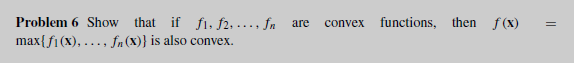

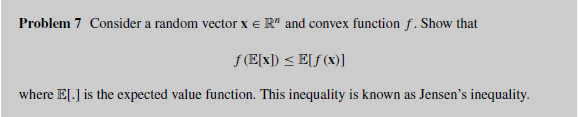

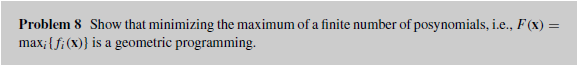